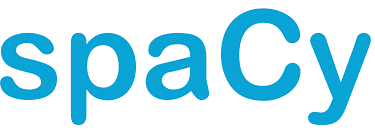
## Spacy: Named Entity Recognition Model
Basado en el tutorial: https://spacy.io/universe/project/video-spacy-course-es
<p>SpaCy es una librería de software para procesamiento de lenguajes naturales, reconocimiento de nombres de entidades, análisis de redes, visualización de datos, análisis, visual analysis, análisis de contenidos, enriching, anotación desarrollado por Matt Honnibal y programado en lenguaje Python. Licencia: Licencia MIT</p>

In [33]:
# Instalaciones necesarias
#%pip install -U numpy
#%pip install -U h5py thinc
#%pip install -U spacy[transformers]

## Inicio
### Requerimientos: Librerias

In [34]:
# Librerias
import spacy
from spacy.lang.es import Spanish

### Elementos basicos para el Analisis de un texto

In [40]:
# Un texto en español
texto01="Lo que hay que saber del dólar hoy lunes 20 de marzo en Argentina, con información completa y actualizada sobre la cotización del dólar en el Banco Nación, en el mercado mayorista y los datos del Banco Central."
texto02="Ella comió pizza."

In [37]:
# Pipeline en español
nlp01=Spanish()

## 1. El objeto DOC
El objeto DOC es el resultado del procesamiento de un texto con el modelo NLP Stacy. Es una lista de palabras (incluyendo numeros y signos de puntuación). Se comporta como una lista. A cada elemento de esa lista se lo llama "tocken". 

In [42]:
# El objeto DOC: aplicacion de NLP al TEXTO
doc01 = nlp01(texto01)
print("Cantidad de tokens (palabras, numeros + signos de puntuacion):",len(doc01))

Cantidad de tokens (palabras, numeros + signos de puntuacion): 41


### 1.1. Un token del texto
Al comportarse como una lista de python, al objeto DOC simple y natural obtenerles un token desde su indice.

In [44]:
# Elementos desde su indice:
token01=doc01[4]
token02=doc01[9]
token03=doc01[14]
print("Obteniendo un token dentro del texto: token01=",token01)
print("Obteniendo otro token dentro del texto: token02=",token02)
print("Obteniendo otro token dentro del texto: token03=",token03)

Obteniendo un token dentro del texto: token01= saber
Obteniendo otro token dentro del texto: token02= 20
Obteniendo otro token dentro del texto: token03= ,


### 1.2. Tipo de elemento
Se puede saber qué tipo de elemento es cada token: si es una palabra (is_alpha), un signo de puntuación (is_punct) o un número (is_digit).

In [45]:
print("{}\t{}\t{}\t{}\t".format("token", "is_alpha", "is_digit", "is_punct"))
print("{}\t{}\t\t{}\t\t{}\t".format(token01, token01.is_alpha, token01.is_digit, token01.is_punct))
print("{}\t{}\t\t{}\t\t{}\t".format(token02, token02.is_alpha, token02.is_digit, token02.is_punct))
print("{}\t{}\t\t{}\t\t{}\t".format(token03, token03.is_alpha, token03.is_digit, token03.is_punct))

token	is_alpha	is_digit	is_punct	
saber	True		False		False	
20	False		True		False	
,	False		False		True	


### 1.3. Una porcion del texto: Span
Gracias a que DOC se comporta como una lista de python, para obtenerle una porcion (span) hago un slice o recorte de la lista (objeto DOC) presentando indice de inicio y fin (sin incluirlo):  

In [46]:
# Span: un recorte de la lista
unSpan=doc01[0:5]
print("Obteniendo una porcion del texto: ",unSpan)

Obteniendo una porcion del texto:  Lo que hay que saber


## 2. Atributos Linguisticos en contexto
Modelos pre-entrenados les permiten a Spacy identificar atributos linguisticos en contexto, dependencias sintacticas y entidades nominales.
Por ejemplo: puede identificar si un span consiste en el nombre y apellido de una persona.<br>
Mas informacion: https://spacy.io/usage/linguistic-features
### 2.1. El paquete es_core_news_sm
Contiene modelos entrenados con noticias en español. Para poder usarlo, primero debe poder descargarse.<br>
El mismo puede cargarse (luego de la descarga):<br>
<b>spacy.load('es_core_news_sm')</b>

In [47]:
#!python -m spacy download es_core_news_sm
print("El texto: ",texto01)
# Inicialización: el pipeline
nlp02 = spacy.load("es_core_news_sm")

El texto:  Lo que hay que saber del dólar hoy lunes 20 de marzo en Argentina, con información completa y actualizada sobre la cotización del dólar en el Banco Nación, en el mercado mayorista y los datos del Banco Central.


### 2.2. Identificacion de Categorias Gramaticales (.pos_):
Las categorias gramaticales (part of speech) son: Verbo, sustantivos, pronombres, adjetivos, etc. 
Spacy permite identificar las categorías gramaticales y las entidades nominales de las palabras de un texto.

In [48]:
# El objeto DOC
doc01=nlp02(texto01)
print("{}\t\t{}".format("texto", "categoria"))
for token in doc01:
    print("{}\t\t{}\t\t{}".format(token.text, token.pos_,token.lemma_))

texto		categoria
Lo		PRON		él
que		PRON		que
hay		AUX		haber
que		SCONJ		que
saber		VERB		saber
del		ADP		del
dólar		NOUN		dólar
hoy		ADV		hoy
lunes		NOUN		lunes
20		NUM		20
de		ADP		de
marzo		NOUN		marzo
en		ADP		en
Argentina		PROPN		Argentina
,		PUNCT		,
con		ADP		con
información		NOUN		información
completa		ADJ		completo
y		CCONJ		y
actualizada		ADJ		actualizado
sobre		ADP		sobre
la		DET		el
cotización		NOUN		cotización
del		ADP		del
dólar		NOUN		dólar
en		ADP		en
el		DET		el
Banco		PROPN		Banco
Nación		PROPN		Nación
,		PUNCT		,
en		ADP		en
el		DET		el
mercado		NOUN		mercado
mayorista		ADJ		mayorista
y		CCONJ		y
los		DET		el
datos		NOUN		dato
del		ADP		del
Banco		PROPN		Banco
Central		PROPN		Central
.		PUNCT		.


Nota: nlp02 es una instancia de "es_core_news_sm". Si no lo usamos, y en su lugar utilizamos nlp01 (instancia de stacy.spanish()), veremos que no se obtienen estos resultados

### 2.3. Dependencias Sintacticas (.dep_)
Un analisis sintactico permite obtener sujeto y predicado, udentificando básicamente el núcleo de la oración. Spacy permite identificar estas dependencias.


In [49]:
# Ejemplo de dependencias sintacticas de un texto:
doc02=nlp02(texto02)
# -> Sujeto: -->    "Ella"
# -> Predicado: --> "comio pizza"
#    -> Nucleo:         --> "comio"
#    -> Objeto Directo: --> "pizza"
print("{}\t\t{}\t{}".format("texto", "Analisis Sintactico", "Dependencia"))
for token in doc02:
    print("{}\t\t{}\t\t\t{}".format(token.text, token.dep_,token.head.text))

texto		Analisis Sintactico	Dependencia
Ella		nsubj			comió
comió		ROOT			comió
pizza		obj			comió
.		punct			comió


In [50]:
# Probaremos 1.2. (ver qué tipo de token es cada uno) con nlp02 aplicado al texto corto
print("{}\t{}\t{}\t{}\t".format("token", "is_alpha", "is_digit", "is_punct"))
print("{}\t{}\t\t{}\t\t{}\t".format(doc02[0], doc02[0].is_alpha, doc02[0].is_digit, doc02[0].is_punct))
print("{}\t{}\t\t{}\t\t{}\t".format(doc02[1], doc02[1].is_alpha, doc02[1].is_digit, doc02[1].is_punct))
print("{}\t{}\t\t{}\t\t{}\t".format(doc02[2], doc02[2].is_alpha, doc02[2].is_digit, doc02[2].is_punct))

token	is_alpha	is_digit	is_punct	
Ella	True		False		False	
comió	True		False		False	
pizza	True		False		False	


### 2.4. Nombres Propios o Entidades Nominales
Spacy puede identificar nombres propios y decir que tipo de nombre propio es: locacion, organizacion, persona, entre otros. Se los llama "entidades nominales" (doc.ent).
El nombre: ent.text
El tipo: ent.label_

In [52]:
# Para este ejemplo utilizaremos el ejemplo de Texto01 que tiene varios nombres propios.
doc03=nlp02(texto01)
print("{}\t{}".format("Nombre", "Tipo"))
for ent in doc03.ents:
    print("{}\t{}".format(ent.text, ent.label_))

Nombre	Tipo
Argentina	LOC
Banco Nación	ORG
Banco Central	ORG


Observacion: Banco Nación fue detectado como una LOC y no como una ORG. Es por la palabra Nación. No sucede lo mismo para Banco Provincia, ni para Banco Municipal, ni Banco Provincial, ni Banco Nacional.

In [53]:
# Explicacion:
print("1. Explicacion de algunas Categorias de .pos_:")
print("{}\t{}".format("Tipo", "Explicacion"))
print("{}\t{}".format("PRON", spacy.explain("PRON")))
print("{}\t{}".format("AUX", spacy.explain("AUX")))
print("{}\t{}".format("SCONJ", spacy.explain("SCONJ")))
print("{}\t{}".format("VERB", spacy.explain("VERB")))
print("{}\t{}".format("ADP", spacy.explain("ADP")))
print("{}\t{}".format("ADV", spacy.explain("ADV")))
print("2. Explicacion de algunas Categorias de .dep_:")
print("{}\t{}".format("nsubj", spacy.explain("nsubj")))
print("{}\t{}".format("ROOT", spacy.explain("ROOT")))
print("{}\t{}".format("noun", spacy.explain("obj")))
print("3. Explicacion de algunas Categorias de .ent.label_:")
print("LOC: ",spacy.explain("LOC"))
print("ORG: ",spacy.explain("ORG"))

1. Explicacion de algunas Categorias de .pos_:
Tipo	Explicacion
PRON	pronoun
AUX	auxiliary
SCONJ	subordinating conjunction
VERB	verb
ADP	adposition
ADV	adverb
2. Explicacion de algunas Categorias de .dep_:
nsubj	nominal subject
ROOT	root
noun	object
3. Explicacion de algunas Categorias de .ent.label_:
LOC:  Non-GPE locations, mountain ranges, bodies of water
ORG:  Companies, agencies, institutions, etc.


## 3. Patrones basados en reglas
Reglas para encontrar palabras y claves en el texto. A diferencia de las ReGex, Spacy trabaja sobre objetos DOC y tokens en lugar del uso de strings en las ReGex.
Es mas flexible ya que no solo podemos buscar textos sino también otros atributos léxicos. Por ejemplo: encontrar "araña" solo si es VERBO y no si es sustantivo. 

## 3.1. Patrones de coincidencias (Matcher)
Un patrón agregado al Matcher consiste en una lista de diccionarios. Cada diccionario describe un token y sus atributos.

In [54]:
from spacy.matcher import Matcher
# nlp=spacy.load("es_core_news_sm")# --> ya lo tenemos: nlp02
texto03="Nuevos diseños de zapatillas en la colección Adidas ZX"
# Iniciar el matcher
matcher01=Matcher(nlp02.vocab)
# Agregar un patron al matcher
patron01=[{"TEXT":"Adidas"},{"TEXT":"ZX"}]
# matcher.add("Identificador del patron que fue buscado, callback (opcional),el patron")
matcher01.add("PATRON_ADIDAS",[patron01])
# procesar el texto
doc04=nlp02(texto03)
# aplicar el matcher01 sobre el doc
res=matcher01(doc04)
# que es res?:
print("res=",res)
# ID_Patron: res[i][0]
# INICIO de la coincidencia: res[i][1]
# FIN de la coincidencia: res[i][2]
spanRes=doc04[res[0][1]:res[0][2]]
print("Resultado: ",spanRes)

res= [(3060392928464876464, 7, 9)]
Resultado:  Adidas ZX


In [55]:
# Otro ejemplo:
texto04="Argentina ganó la copa Mundial FIFA 2022. Francia salió segundo."
doc04=nlp02(texto04)
patron01=[{"POS":"PROPN","OP":"?"},{"LEMMA":"ganar","POS":"VERB"},{"LOWER":"la"},{"LOWER":"copa"},{"LOWER":"mundial"},{"LOWER":"fifa"},{"IS_DIGIT":True},{"IS_PUNCT":True}]
patron02=[{"POS":"PROPN","OP":"?"},{"LEMMA":"salir","POS":"VERB"},{"LOWER":"segundo"},{"IS_PUNCT":True}]
matcher04a=Matcher(nlp02.vocab)
matcher04a.add("FIFA_PATRON",[patron01])
matcher04b=Matcher(nlp02.vocab)
matcher04b.add("FIFA_PATRON",[patron02])
res1=matcher04a(doc04)
res2=matcher04b(doc04)
# Preguntas:
print("¿ Quien ",doc04[res1[0][1]+1:res1[0][2]-1],"?   ...   ",doc04[res1[0][1]])
print("¿ Quien ",doc04[res2[0][1]+1:res2[0][2]-1],"?   ...   ",doc04[res2[0][1]])

¿ Quien  ganó la copa Mundial FIFA 2022 ?   ...    Argentina
¿ Quien  salió segundo ?   ...    Francia


## 4. Estructuras de datos en Spacy
### 4.1. Vocab
#### Hashes en Vocab
Para reducir memoria, en Vocab se almacenan los hashes de los strings y no los strings. Es por eso que se tienen que guardar la referencia bidireccional.

In [56]:
# string a hash
unString="Cerveza"
hashString=nlp02.vocab.strings[unString]
print("hash del string:",hashString)
# string del hash
elString=nlp02.vocab.strings[hashString]
print("el string hasheado es:",elString)


hash del string: 4509832299175612861
el string hasheado es: Cerveza


#### Lexemas
Un objeto Lexeme es una entrada en el vocabulario. Contiene información del contexto (a diferencia de pos_ y dep_)

In [57]:
# El lexema del sring Cerveza
lexema=nlp02.vocab[unString]
# imprimir los atributos del lexema
print(lexema.text,lexema.orth,lexema.is_alpha)

Cerveza 4509832299175612861 True


### 4.2. DOC
Un DOC puede armarse a partir de una lista.

In [58]:
# importamos la clase Doc
from spacy.tokens import Doc
# Las palabras de la frase y los espacios
wordsDeUnaFrase=["¿","Qué","hora","es","?"]
espacios=[False,True,True,False,False]
# Creación del Doc
elDoc=Doc(nlp02.vocab,words=wordsDeUnaFrase,spaces=espacios)
print(elDoc)

¿Qué hora es?


### 4.3. Span
Un Span es un slice (una porcion) de un doc, con al menos un tocken. Un Span también puede armarse manualmente. Argumentos: doc, inicio, fin.

In [59]:
# importamos la clase Span
from spacy.tokens import Span
# armamos el span
elSpan=Span(elDoc,1,3)
print(elSpan)


Qué hora


## 5. Similitud semantica
Spacy provee herramientas para calcular la similitud semantica entre docs, span y tokens.<br>
<b>Importante: para usar medidas de similitud semantica no alcanza con los modelos "_sm" sino que se requiere al menos uno mediano "_md" o bien el grande "_lg".<b>

In [60]:
# Descargamos el modelo mediano
#!python -m spacy download es_core_news_md
# Inicialización: el pipeline
nlp03 = spacy.load("es_core_news_md")

In [61]:
# recordando el string anterior:
texto05="¡Qué rica cerveza!"
doc05=nlp03(texto05)
print("Texto 5",doc05)
# declaro otro string

texto06="¡Qué buen vino!"
doc06=nlp03(texto06)
print("Texto 6",doc06)
# Imprimir la similaridad entre las frases
print("Similaridad(Texto 5, Texto 6)=",doc05.similarity(doc06))
print("")
texto07="Mi celular tiene poca batería"
doc07=nlp03(texto07)
print("Texto 7",doc07)
# Imprimir la similaridad entre las frases
print("Similaridad(Texto 5, Texto 7)=",doc05.similarity(doc07))


Texto 5 ¡Qué rica cerveza!
Texto 6 ¡Qué buen vino!
Similaridad(Texto 5, Texto 6)= 0.9236639540277649

Texto 7 Mi celular tiene poca batería
Similaridad(Texto 5, Texto 7)= 0.2183370974420808


Pueden compararse objetos algo diferentes

In [62]:
# Obtenemos un Span de doc02
unSpan=Span(doc05,2,4)
print("unaParte =",unSpan)
# Comparamos Frase_1 con unSpan
print("Similaridad(Texto 5, unSpan)=",doc05.similarity(unSpan))


unaParte = rica cerveza
Similaridad(Texto 5, unSpan)= 0.4644828818621958


## 6. Combinando modelos estadisticos y reglas
Usar patrones basados en modelos estadísticos (Matchers) es de utilidad al querer generalizar basado en pocos ejemplos (ver si un span es una ORG). En cambio, el uso de reglas permite trabajar sobre conjuntos finitos (por ejemplo: listado de Paises).

### 6.1. Patrones basados en reglas
Phrase Matcher permite hallar las coincidencias en una frase pero accediendo a los tokens. Es decir, podremos armar un patron a partir de los atributos de cada token.
Pueden hallarse listas de palabras en grandes volúmenes de texto más rápida y eficientemente que el Matcher().

In [63]:
# Ejemplo: Dentro de una frase, hallar una subfrase con phraseMatcher()
#
# Importar la clase
from spacy.matcher import PhraseMatcher
# una frase
texto07="Yo tengo un perro labrador dorado de 25 hg."
doc07=nlp03(texto07)
subFrase="labrador dorado"
docSubFrase=nlp03(subFrase)
# Creo el matcher
matcher=PhraseMatcher(nlp03.vocab)
# El patron
patron=nlp03(docSubFrase) # OBS: no hay que armar dict, solo pasar la subFrase
matcher.add("PERRO",[patron])
# Resultado
res=matcher(doc07)
print("Res=",res)
# Mostrar Span resultado
for match_id,start,end in res:
    spanRes=doc07[start:end]
print("span resultado:",spanRes)

Res= [(3555895899399010589, 4, 6)]
span resultado: labrador dorado


## 7. Personalizacion del Pipeline
El pipeline utiliza informacion de los modelos entrenados de spacy. Sin embargo, puede agregarse mas informacion a los modelos, utiles por ejemplo para: agregar entidades.
### 7.1. Componentes del pipeline
* Tagger: Crea etiquetas POS entre otras
* Parser: Crea etiquetas de dependencias head, dep, sent, etc
* NER: Crea etiquetas nominales ent
* Textcat: Clasifica al texto

In [64]:
# Nombres de componentes del pipeline:
print("Componentes del pipeline nlp03:",nlp03.pipe_names)
print("Detalle del pipeline nlp03:",nlp03.pipeline)

Componentes del pipeline nlp03: ['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
Detalle del pipeline nlp03: [('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x7c2758a4e630>), ('morphologizer', <spacy.pipeline.morphologizer.Morphologizer object at 0x7c27575fffb0>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x7c2757e32030>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x7c2758dd0710>), ('lemmatizer', <spacy.lang.es.lemmatizer.SpanishLemmatizer object at 0x7c275901e350>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x7c2757e31620>)]


### 7.2. Componentes personalizados del Pipeline
Pueden agregarse funcionalidades al Pipeline. Por ejemplo, modificar un texto. Puede agregarse metadatos personalizados a los documentos. Pueden actualizarse atributos como los doc.ents

In [65]:
# Ejemplo: Se creará una componente que imprime en pantalla la cant. de palabras del doc
#
# Un pipeline:
nlp04=spacy.load("es_core_news_sm")
# La funcion:
@nlp04.component("contarDoc")
def contarTokens (doc):
    # Imprime la long. del Doc:
    print("Longitud del documento: ",len(doc))
    return doc
# Añade la componente al inicio del pipeline
nlp04.add_pipe("contarDoc",first=True)
# Imprime los nombres de las componentes
print("Pipeline:",nlp04.pipe_names)

Pipeline: ['contarDoc', 'tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [66]:
# Procesamos un texto:
doc05=nlp04(texto04)
print("Texto:",doc05)

Longitud del documento:  12
Texto: Argentina ganó la copa Mundial FIFA 2022. Francia salió segundo.
